# Unit 5 - Financial Planning


In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price
btc_url = btc_url + "?format=json"
eth_url = eth_url + "?format=json"
requests.get(btc_url)
requests.get(eth_url)
btc_response_data = requests.get(btc_url)
eth_response_data = requests.get(eth_url)

# Compute current value of my crpto
btc_response_data = btc_response_data.json()
eth_response_data = eth_response_data.json()
# Print current crypto wallet balance
btc_price_current = float(btc_response_data['data']['1']['quotes']['USD']['price'])
eth_price_current = float(eth_response_data['data']['1027']['quotes']['USD']['price'])
my_btc_value = my_btc*btc_price_current
my_eth_value = my_eth*eth_price_current
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $15570.60
The current value of your 5.3 ETH is $2189.32


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Current amount of shares
my_agg = 200
my_spy = 50

In [7]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2"
)

In [8]:
# Format current date as ISO format
today = pd.Timestamp('2020-05-01', tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today
).df

# Preview DataFrame
df_portfolio

AGG                                       \
                             open      high       low  close    volume   
time                                                                     
2020-05-01 00:00:00-04:00  116.97  117.0998  116.6775  116.9  11778582   

                              SPY                                       
                             open      high     low   close     volume  
time                                                                    
2020-05-01 00:00:00-04:00  285.31  290.6572  281.52  282.73  222309009

In [9]:
# Pick AGG and SPY close prices
agg_close_price = float(df_portfolio["AGG"]["close"])
spy_close_price = float(df_portfolio["SPY"]["close"])
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $116.9
Current SPY closing price: $282.73


In [10]:
# Compute the current value of shares
my_agg_value = my_agg*agg_close_price
my_spy_value = my_spy*spy_close_price

# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $14136.50
The current value of your 200 AGG shares is $23380.00


### Savings Health Analysis

In [11]:
# Set monthly household income
monthly_income = 12000
my_shares_value = my_agg_value+my_spy_value
my_crypto_value = my_btc_value+my_eth_value

# Create savings DataFrame
savings_value = {   
    "amount":[my_shares_value,my_crypto_value],
    "shares": [my_shares_value],
    "crypto": [my_crypto_value]
}

df_savings = pd.DataFrame(savings_value, index=["shares", "crypto"], columns=["amount"])

# Display savings DataFrame
display(df_savings)

,amount
shares,37516.500
crypto,17759.924


<AxesSubplot:title={'center':'Composition of Personal Savings'}, ylabel='amount'>

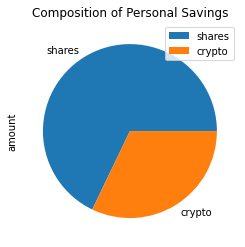

In [12]:
# Plot savings pie chart
df_savings.plot.pie(y="amount", title="Composition of Personal Savings")

In [13]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = my_shares_value + my_crypto_value

# Validate saving health
if total_savings > emergency_fund:
    print("Congratulations! You have enough money in your savings fund!")
elif total_savings == emergency_fund:
    print("Congratulations!  You have reached your financial goal!")
elif total_savings < emergency_fund:
    print(f"You are ${(emergency_fund-total_savings)} away from reaching your savings goal of ${emergency_fund}!")

Congratulations! You have enough money in your savings fund!


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [14]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2015-08-07', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-08-07', tz='America/New_York').isoformat()

In [15]:
# Get 5 years' worth of historical data for SPY and AGG
ticker = ['SPY', 'AGG']
timeframe = "1D"
df_stock_data = alpaca.get_barset(
    ticker,
    timeframe,
    start=start_date,
    end=end_date
).df
# Display sample data
df_stock_data.head()

AGG                                        \
                             open      high      low   close     volume   
time                                                                      
2015-08-07 00:00:00-04:00  109.14  109.2750  109.035  109.21  2041167.0   
2015-08-10 00:00:00-04:00  109.15  109.1700  108.920  109.06  1149778.0   
2015-08-11 00:00:00-04:00  109.42  109.5765  109.284  109.42  1420907.0   
2015-08-12 00:00:00-04:00  109.55  109.7100  109.350  109.36  1468979.0   
2015-08-13 00:00:00-04:00  109.36  109.3651  109.110  109.15  1465173.0   

                              SPY                                     
                             open    high     low   close     volume  
time                                                                  
2015-08-07 00:00:00-04:00  208.16  208.34  206.87  207.93   87669782  
2015-08-10 00:00:00-04:00  209.28  210.67  209.28  210.58   66755890  
2015-08-11 00:00:00-04:00  208.98  209.47  207.76  208.63   88424557  
2015-08-12 00:00:00-04:00  207.11  209.14  205.36  208.89  136171450  
2015-08-13 00:00:00-04:00  208.73  209.55  208.01  208.63   77197796

In [16]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
year = 30
initial_investment = 20000
investment_increase = 1.5

trading_days = 252*year

MC_simulation = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = trading_days
)

In [17]:
# Printing the simulation input data
MC_simulation.portfolio_data.head()

AGG                                        \
                             open      high      low   close     volume   
time                                                                      
2015-08-07 00:00:00-04:00  109.14  109.2750  109.035  109.21  2041167.0   
2015-08-10 00:00:00-04:00  109.15  109.1700  108.920  109.06  1149778.0   
2015-08-11 00:00:00-04:00  109.42  109.5765  109.284  109.42  1420907.0   
2015-08-12 00:00:00-04:00  109.55  109.7100  109.350  109.36  1468979.0   
2015-08-13 00:00:00-04:00  109.36  109.3651  109.110  109.15  1465173.0   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2015-08-07 00:00:00-04:00          NaN  208.16  208.34  206.87  207.93   
2015-08-10 00:00:00-04:00    -0.001374  209.28  210.67  209.28  210.58   
2015-08-11 00:00:00-04:00     0.003301  208.98  209.47  207.76  208.63   
2015-08-12 00:00:00-04:00    -0.000548  207.11  209.14  205.36  208.89   
2015-08-13 00:00:00-04:00    -0.001920  208.73  209.55  208.01  208.63   

                                                   
                              volume daily_return  
time                                               
2015-08-07 00:00:00-04:00   87669782          NaN  
2015-08-10 00:00:00-04:00   66755890     0.012745  
2015-08-11 00:00:00-04:00   88424557    -0.009260  
2015-08-12 00:00:00-04:00  136171450     0.001246  
2015-08-13 00:00:00-04:00   77197796    -0.001245

In [18]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_simulation.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.994636,0.992076,0.999108,1.000704,1.000124,1.006543,0.999565,0.995948,1.005674,1.001842,...,0.997991,1.002419,0.995974,1.003877,0.997916,0.995810,1.005210,0.996974,0.995405,1.004391
2,0.996018,0.989239,0.996317,0.995656,0.994561,1.001149,1.002819,0.996090,1.000480,1.002761,...,0.995303,1.010988,0.998300,1.006291,0.990910,0.989862,1.002907,1.007856,1.007181,1.002533
3,1.000817,0.991079,0.995563,0.995494,0.999414,0.998824,1.011828,1.008084,1.009895,0.992666,...,0.988789,1.017229,0.992671,1.006261,0.984645,0.986246,1.006886,1.008386,0.999234,1.006421
4,0.999534,0.979750,1.001489,0.998293,0.994526,0.997010,1.014585,1.016653,1.015171,1.002481,...,0.992760,1.025439,0.993162,1.001483,0.979846,0.988784,1.008810,1.015849,0.996157,1.015954
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,5.077868,5.887078,7.956344,3.038575,2.824577,3.239022,2.924880,3.584786,4.747253,4.332018,...,9.021457,4.189131,7.902653,4.116392,5.043572,6.575410,6.093971,4.334827,7.640394,4.303483
7557,5.062434,5.953807,7.914927,3.026356,2.838967,3.213065,2.930592,3.618975,4.741879,4.326093,...,8.991313,4.183578,7.884629,4.129099,4.999670,6.544272,6.129100,4.373659,7.575561,4.294743
7558,5.049264,5.949923,7.963082,3.039801,2.840688,3.208872,2.939293,3.642514,4.750546,4.368468,...,9.016110,4.199419,7.897258,4.201979,4.963685,6.542749,6.122637,4.337638,7.615937,4.317078
7559,5.065934,5.958157,8.002405,3.037831,2.851695,3.211769,2.956061,3.671120,4.842520,4.349666,...,9.097666,4.199374,7.937841,4.206015,4.941872,6.626678,6.092425,4.334898,7.621488,4.314175


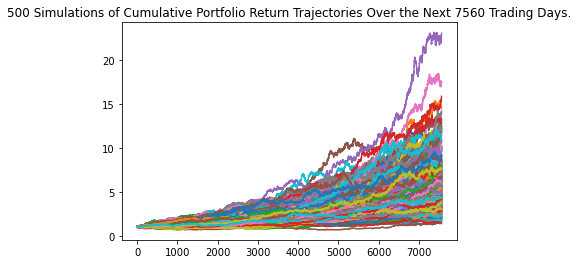

In [19]:
# Plot simulation outcomes
line_plot = MC_simulation.plot_simulation()

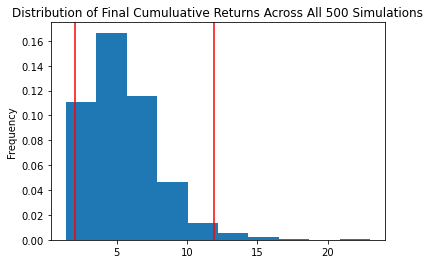

In [20]:
# Plot probability distribution and confidence intervals
dist_plot = MC_simulation.plot_distribution()

### Retirement Analysis

In [21]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_simulation.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean              5.511283
std               2.595653
min               1.393100
25%               3.602709
50%               5.187397
75%               6.760748
max              23.015308
95% CI Lower      2.038187
95% CI Upper     11.918280
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [23]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8]*initial_investment)
ci_upper = round(tbl[9]*initial_investment)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $40764 and $238366


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [24]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(tbl[8]*initial_investment)
ci_upper = round(tbl[9]*initial_investment)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $61146 and $357548


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [25]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_fiveyear = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*5
)
MC_fiveyear.portfolio_data.head()

AGG                                        \
                             open      high      low   close     volume   
time                                                                      
2015-08-07 00:00:00-04:00  109.14  109.2750  109.035  109.21  2041167.0   
2015-08-10 00:00:00-04:00  109.15  109.1700  108.920  109.06  1149778.0   
2015-08-11 00:00:00-04:00  109.42  109.5765  109.284  109.42  1420907.0   
2015-08-12 00:00:00-04:00  109.55  109.7100  109.350  109.36  1468979.0   
2015-08-13 00:00:00-04:00  109.36  109.3651  109.110  109.15  1465173.0   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2015-08-07 00:00:00-04:00          NaN  208.16  208.34  206.87  207.93   
2015-08-10 00:00:00-04:00    -0.001374  209.28  210.67  209.28  210.58   
2015-08-11 00:00:00-04:00     0.003301  208.98  209.47  207.76  208.63   
2015-08-12 00:00:00-04:00    -0.000548  207.11  209.14  205.36  208.89   
2015-08-13 00:00:00-04:00    -0.001920  208.73  209.55  208.01  208.63   

                                                   
                              volume daily_return  
time                                               
2015-08-07 00:00:00-04:00   87669782          NaN  
2015-08-10 00:00:00-04:00   66755890     0.012745  
2015-08-11 00:00:00-04:00   88424557    -0.009260  
2015-08-12 00:00:00-04:00  136171450     0.001246  
2015-08-13 00:00:00-04:00   77197796    -0.001245

In [26]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_fiveyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.000638,1.003493,1.001551,1.003064,0.998670,1.001046,1.001787,1.001313,0.998344,1.000106,...,0.998211,0.999670,1.006612,1.006486,1.005795,1.000659,1.005514,0.998316,0.997215,1.008307
2,0.995255,1.002936,0.989634,0.998273,0.998521,1.001100,0.999841,1.007730,0.995095,1.010310,...,0.988487,0.995961,1.005064,1.008433,1.002437,1.001227,1.000465,0.992842,0.999148,1.010307
3,0.997860,0.995509,0.986431,1.002154,0.997523,0.991635,1.004643,1.007206,0.999083,1.011214,...,0.998749,0.996924,1.009952,1.001014,0.993091,0.991834,1.005317,0.992285,0.997561,1.016421
4,0.995583,0.996952,0.989674,1.001042,0.994444,0.989069,1.004843,1.013942,0.995233,1.019326,...,0.989074,0.987890,1.018550,0.994474,0.998433,0.997709,1.003586,0.993321,0.990846,1.014410
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.422447,1.052357,1.170224,1.436816,1.150119,1.278590,1.851597,1.520037,1.008425,1.974170,...,1.338524,1.148279,1.723659,1.354872,1.480211,1.571545,1.383985,1.528483,1.436282,1.593818
1257,1.420010,1.049919,1.171045,1.430844,1.153661,1.281306,1.856672,1.518202,1.005144,1.976075,...,1.339264,1.147236,1.741959,1.356260,1.499677,1.571692,1.390687,1.522615,1.436964,1.593271
1258,1.422373,1.054669,1.173289,1.431760,1.153886,1.267567,1.859960,1.507893,1.010441,1.981516,...,1.337796,1.148320,1.747547,1.348649,1.496030,1.582265,1.385075,1.531381,1.450095,1.584537
1259,1.424670,1.052914,1.156991,1.437513,1.158831,1.272294,1.858885,1.500247,1.013388,1.982958,...,1.341191,1.142521,1.754244,1.355180,1.489458,1.592553,1.384123,1.532431,1.443865,1.605543


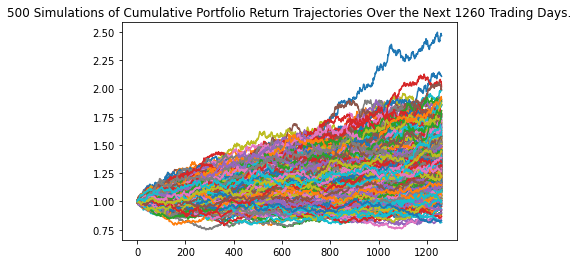

In [27]:
# Plot simulation outcomes
line_plot = MC_fiveyear.plot_simulation()

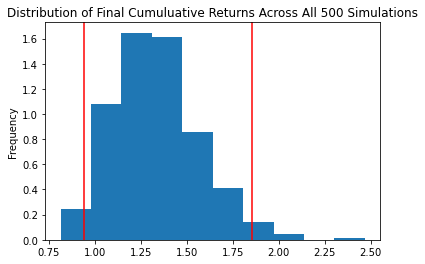

In [28]:
# Plot probability distribution and confidence intervals
dist_plot = MC_fiveyear.plot_distribution()

In [30]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_fiveyear.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean              1.332651
std               0.233721
min               0.815176
25%               1.166436
50%               1.313457
75%               1.464081
max               2.467367
95% CI Lower      0.942980
95% CI Upper      1.856654
Name: 1260, dtype: float64


In [31]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(tbl[8]*initial_investment,2)
ci_upper_five = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $56578.81 and $111399.21


### Ten Years Retirement Option

In [32]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_tenyear = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*10
)
MC_tenyear.portfolio_data

AGG                                           \
                             open      high       low    close      volume   
time                                                                         
2015-08-07 00:00:00-04:00  109.14  109.2750  109.0350  109.210   2041167.0   
2015-08-10 00:00:00-04:00  109.15  109.1700  108.9200  109.060   1149778.0   
2015-08-11 00:00:00-04:00  109.42  109.5765  109.2840  109.420   1420907.0   
2015-08-12 00:00:00-04:00  109.55  109.7100  109.3500  109.360   1468979.0   
2015-08-13 00:00:00-04:00  109.36  109.3651  109.1100  109.150   1465173.0   
...                           ...       ...       ...      ...         ...   
2020-08-03 00:00:00-04:00  119.37  119.4000  119.1903  119.400  17837420.0   
2020-08-04 00:00:00-04:00  119.42  119.6300  119.4200  119.630  21512268.0   
2020-08-05 00:00:00-04:00  119.39  119.4900  119.3100  119.400  34175883.0   
2020-08-06 00:00:00-04:00  119.62  119.7300  119.5300  119.580   9009216.0   
2020-08-07 00:00:00-04:00  119.66  119.7300  119.3950  119.445   8830420.0   

                                             SPY                          \
                          daily_return      open    high     low   close   
time                                                                       
2015-08-07 00:00:00-04:00          NaN  208.1600  208.34  206.87  207.93   
2015-08-10 00:00:00-04:00    -0.001374  209.2800  210.67  209.28  210.58   
2015-08-11 00:00:00-04:00     0.003301  208.9800  209.47  207.76  208.63   
2015-08-12 00:00:00-04:00    -0.000548  207.1100  209.14  205.36  208.89   
2015-08-13 00:00:00-04:00    -0.001920  208.7300  209.55  208.01  208.63   
...                                ...       ...     ...     ...     ...   
2020-08-03 00:00:00-04:00    -0.001338  328.3200  329.62  327.73  328.76   
2020-08-04 00:00:00-04:00     0.001926  327.8600  330.06  327.86  330.03   
2020-08-05 00:00:00-04:00    -0.001923  331.4700  332.39  331.18  332.06   
2020-08-06 00:00:00-04:00     0.001508  331.4799  334.46  331.13  334.31   
2020-08-07 00:00:00-04:00    -0.001129  333.2800  334.88  332.30  334.55   

                                                   
                              volume daily_return  
time                                               
2015-08-07 00:00:00-04:00   87669782          NaN  
2015-08-10 00:00:00-04:00   66755890     0.012745  
2015-08-11 00:00:00-04:00   88424557    -0.009260  
2015-08-12 00:00:00-04:00  136171450     0.001246  
2015-08-13 00:00:00-04:00   77197796    -0.001245  
...                              ...          ...  
2020-08-03 00:00:00-04:00   71741125     0.006768  
2020-08-04 00:00:00-04:00   73684427     0.003863  
2020-08-05 00:00:00-04:00   72846458     0.006151  
2020-08-06 00:00:00-04:00   76900649     0.006776  
2020-08-07 00:00:00-04:00   98710236     0.000718  

[1260 rows x 12 columns]

In [33]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_tenyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.997191,1.003546,1.005247,1.002349,0.995178,0.996458,0.990948,0.996124,1.001029,0.994900,...,0.995978,0.993690,1.000393,0.992247,1.007969,0.989003,0.997744,1.004549,1.004361,1.005930
2,1.004183,1.006182,1.014656,0.995444,1.002671,0.994863,0.989403,1.000817,0.992727,0.990240,...,0.988723,1.007035,1.000438,0.988390,1.003330,0.981676,0.995859,1.006355,1.005400,1.008393
3,1.002456,1.004867,1.015641,0.988476,0.998660,0.995891,0.999540,1.004075,0.991109,0.989142,...,0.996157,1.012010,1.010713,0.991461,1.003146,0.980960,0.999456,1.005830,1.009633,1.013484
4,0.999030,1.004623,1.018769,0.985720,0.995987,0.995010,0.999753,0.998596,0.995244,0.991183,...,0.990720,1.027716,1.014641,0.982918,0.993916,0.979201,0.994486,1.008451,1.019114,1.015205
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.084199,2.268348,1.152935,2.488333,1.864410,1.799229,1.584044,2.101220,1.509626,1.129854,...,1.853215,1.414516,1.712037,1.669728,1.615265,2.147664,1.929438,1.519027,2.646239,2.144567
2517,2.092838,2.258679,1.151781,2.506261,1.867285,1.806366,1.586652,2.094493,1.504191,1.133264,...,1.854431,1.419505,1.712942,1.669782,1.611913,2.138726,1.925668,1.531694,2.666637,2.145779
2518,2.085244,2.263550,1.135035,2.522671,1.863529,1.798321,1.579331,2.096889,1.510097,1.134406,...,1.861438,1.427261,1.707473,1.680086,1.620946,2.135378,1.941676,1.535114,2.667409,2.155909
2519,2.057106,2.263020,1.134833,2.509573,1.871643,1.805167,1.587982,2.081083,1.510285,1.141513,...,1.867206,1.424579,1.696358,1.696955,1.619326,2.131497,1.952215,1.534201,2.636820,2.166888


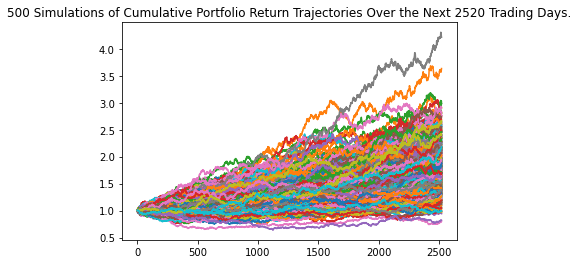

In [34]:
# Plot simulation outcomes
line_plot = MC_tenyear.plot_simulation()

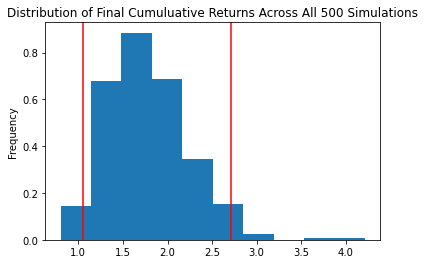

In [35]:
# Plot probability distribution and confidence intervals
dist_plot = MC_tenyear.plot_distribution()

In [36]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_tenyear.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean              1.776650
std               0.449026
min               0.800710
25%               1.441220
50%               1.732208
75%               2.065213
max               4.212540
95% CI Lower      1.048746
95% CI Upper      2.712403
Name: 2520, dtype: float64


In [37]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(tbl[8]*initial_investment,2)
ci_upper_ten = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $62924.74 and $162744.16
